In [1]:
import numpy as np
import pandas as pd

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('./datasets/revenueprediction/train.csv',parse_dates=['placement date'])

In [4]:
df.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,01-01-2018,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,01-01-2018,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,01-01-2018,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,01-01-2018,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,01-01-2018,48185,Michigan,2018-01-01


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               6700 non-null   int64         
 1   departure city   6700 non-null   object        
 2   discount         6700 non-null   float64       
 3   price            6700 non-null   float64       
 4   no of items      6700 non-null   int64         
 5   location         6700 non-null   object        
 6   class            6700 non-null   object        
 7   segment          6700 non-null   object        
 8   sub-class        6700 non-null   object        
 9   delivery type    6699 non-null   object        
 10  RID              6700 non-null   int64         
 11  profit           6700 non-null   float64       
 12  delivery date    6700 non-null   object        
 13  address code     6700 non-null   int64         
 14  departure state  6700 non-null   object 

In [6]:
df.describe()

,id,discount,price,no of items,RID,profit,address code
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,3350.500000,0.155876,234.424275,3.798507,4954.381791,29.121046,54719.073284
std,1934.267734,0.205922,641.440815,2.225327,2921.304952,230.712951,32092.421012
min,1.000000,0.000000,0.836000,1.000000,1.000000,-6599.978000,1040.000000
25%,1675.750000,0.000000,17.340000,2.000000,2389.750000,1.713750,22204.000000
50%,3350.500000,0.200000,54.960000,3.000000,4941.500000,8.803200,55113.000000
75%,5025.250000,0.200000,212.940000,5.000000,7507.250000,30.023400,90004.000000
max,6700.000000,0.800000,22638.480000,14.000000,9990.000000,8399.976000,99301.000000


In [7]:
df.groupby('class').nunique()

,id,departure city,discount,price,no of items,location,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
class,,,,,,,,,,,,,,,
fynota,1229,274,7,931,14,4,3,4,4,1229,1058,37,337,46,37
kariox,4034,417,5,2565,14,4,3,9,4,4034,3039,37,504,46,37
qexty,1437,317,11,1201,14,4,3,4,4,1437,1259,37,390,47,37


In [8]:
df['class'].nunique()


3

In [9]:
df[df['class']=="kariox"]['sub-class'].value_counts()


headset       1025
phone          913
laptop         559
television     513
battery        303
tablet         250
watch          185
lighting       155
charger        131
Name: sub-class, dtype: int64

In [10]:
df1=df.loc[(df['class']=="kariox")&(df['sub-class']=="phone")]

In [11]:
df1=df1.loc[:,('profit','placement date')];

In [12]:
df1['placement date']=pd.to_datetime(df['placement date'])

In [13]:
df1 = df1.groupby('placement date')['profit'].sum().reset_index()

In [14]:
df1 = df1.set_index('placement date')
df1.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2021-01-01'],
              dtype='datetime64[ns]', name='placement date', freq=None)

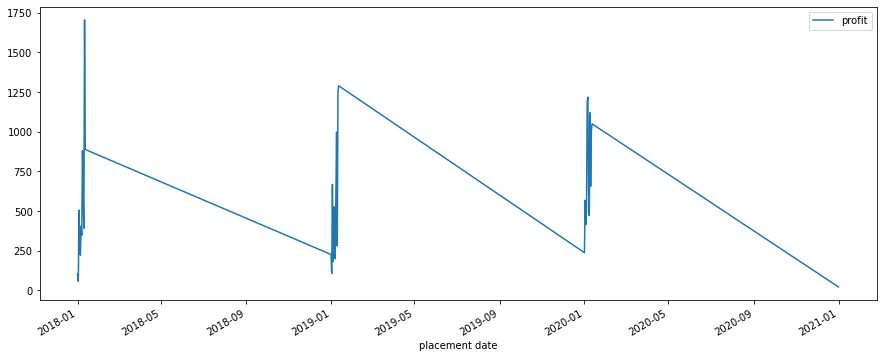

In [15]:
df1.plot(figsize=(15, 6))
plt.show()

In [16]:
df1.sort_index(inplace=True)

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df1, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [ ]:
df1